QUESTION 1

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [18]:

new_fruit = np.array([165, 5.5])


In [20]:

data = {
    'fruitId': [1, 2, 3, 4, 5, 6],
    'weights': [180, 200, 150, 170, 160, 140],
    'sweetness_level': [7, 6, 4, 5, 6, 3],
    'label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
}

df = pd.DataFrame(data)
df.to_csv('fruits.csv', index=False)

df = pd.read_csv('fruits.csv')


In [21]:

new_fruit = np.array([165, 5.5])
k = 3

In [23]:

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p=3):
    return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)

In [24]:
distances = []
for index, row in df.iterrows():
    train_point = np.array([row['weights'], row['sweetness_level']])
    dist = {
        'index': index,
        'euclidean': euclidean_distance(new_fruit, train_point),
        'manhattan': manhattan_distance(new_fruit, train_point),
        'minkowski': minkowski_distance(new_fruit, train_point),
        'label': row['label']
    }
    distances.append(dist)


In [25]:

distances_sorted = sorted(distances, key=lambda x: x['euclidean'])
top_k_neighbors = distances_sorted[:k]


In [26]:

labels = [neighbor['label'] for neighbor in top_k_neighbors]
predicted_label = Counter(labels).most_common(1)[0][0]

In [27]:

print(f"Predicted label for the new fruit: {predicted_label}")
print("Calculated Distances:")
for neighbor in distances_sorted:
    print(f"Index: {neighbor['index']}, Euclidean: {neighbor['euclidean']:.2f}, "
          f"Manhattan: {neighbor['manhattan']:.2f}, Minkowski: {neighbor['minkowski']:.2f}, "
          f"Label: {neighbor['label']}")


Predicted label for the new fruit: Apple
Calculated Distances:
Index: 3, Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Orange
Index: 4, Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Apple
Index: 0, Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Apple
Index: 2, Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Orange
Index: 5, Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: Orange
Index: 1, Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: Apple


In [28]:

label_map = {'Apple': 0, 'Orange': 1}
df['label_numeric'] = df['label'].map(label_map)


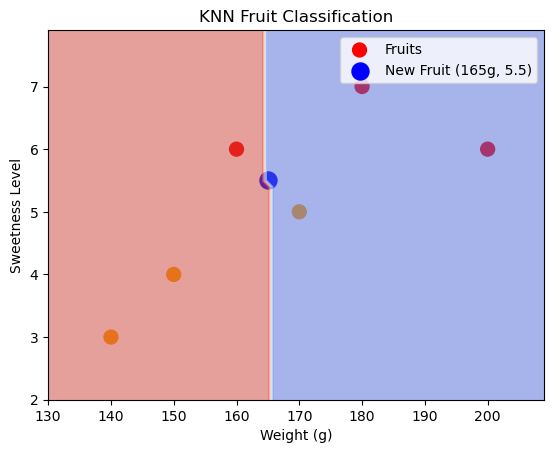

In [31]:

colors = {0: 'red', 1: 'orange'}
plt.scatter(df['weights'], df['sweetness_level'], 
            c=df['label_numeric'].map(colors), label='Fruits', s=100)

plt.scatter(new_fruit[0], new_fruit[1], color='blue', label='New Fruit (165g, 5.5)', s=150)

x_min, x_max = df['weights'].min() - 10, df['weights'].max() + 10
y_min, y_max = df['sweetness_level'].min() - 1, df['sweetness_level'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))


Z = np.array([
    Counter([
        df.iloc[i]['label'] for i in np.argsort(
            [euclidean_distance(np.array([xx_, yy_]), np.array([row['weights'], row['sweetness_level']])) for _, row in df.iterrows()]
        )[:k]
    ]).most_common(1)[0][0]
    for xx_, yy_ in zip(np.ravel(xx), np.ravel(yy))
])

Z_numeric = np.array([label_map[label] for label in Z]).reshape(xx.shape)
plt.contourf(xx, yy, Z_numeric, alpha=0.5, cmap='coolwarm')
plt.xlabel('Weight (g)')
plt.ylabel('Sweetness Level')
plt.title('KNN Fruit Classification')
plt.legend()
plt.show()


QUESTION 1B

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Predicted label for the new fruit (165g, 5.5): Orange
Euclidean distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski distances: [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


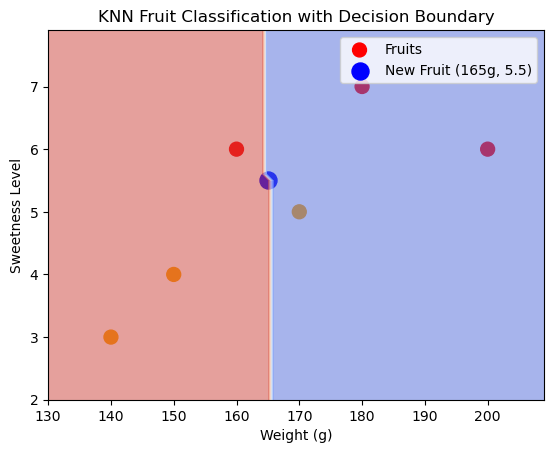

In [45]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

data = {
    'fruitId': [1, 2, 3, 4, 5, 6],
    'weights': [180, 200, 150, 170, 160, 140],
    'sweetness_level': [7, 6, 4, 5, 6, 3],
    'label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
}

df = pd.DataFrame(data)

new_fruit = np.array([[165, 5.5]])
k = 3 

X = df[['weights', 'sweetness_level']]
y = df['label']
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

predicted_label = knn.predict(new_fruit)
print(f"Predicted label for the new fruit (165g, 5.5): {predicted_label[0]}")

euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3)

print("Euclidean distances:", euclidean_distances.flatten())
print("Manhattan distances:", manhattan_distances.flatten())
print("Minkowski distances:", minkowski_distances.flatten())

colors = {'Apple': 'red', 'Orange': 'orange'}
plt.scatter(df['weights'], df['sweetness_level'], 
            c=df['label'].map(colors), label='Fruits', s=100)

plt.scatter(new_fruit[0][0], new_fruit[0][1], color='blue', label='New Fruit (165g, 5.5)', s=150)

x_min, x_max = df['weights'].min() - 10, df['weights'].max() + 10
y_min, y_max = df['sweetness_level'].min() - 1, df['sweetness_level'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z_numeric = np.array([1 if label == 'Orange' else 0 for label in Z]).reshape(xx.shape)

plt.contourf(xx, yy, Z_numeric, alpha=0.5, cmap='coolwarm')
plt.xlabel('Weight (g)')
plt.ylabel('Sweetness Level')
plt.title('KNN Fruit Classification with Decision Boundary')
plt.legend()
plt.show()


QUESTION 2A

In [46]:
import pandas as pd
import numpy as np
from collections import Counter
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    ent = 0
    for count in counts:
        probability = count / len(target_col)
        ent -= probability * np.log2(probability)
    return ent

overall_entropy = entropy(df['Diagnosis'])
print(f"Overall Entropy: {overall_entropy:.4f}")

def info_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for value, count in zip(values, counts):
        subset = data[data[feature] == value]
        weighted_entropy += (count / len(data)) * entropy(subset[target])
    return total_entropy - weighted_entropy
features = ['Age', 'Blood Pressure', 'Cholesterol']
info_gains = {feature: info_gain(df, feature, 'Diagnosis') for feature in features}
for feature, gain in info_gains.items():
    print(f"Information Gain for {feature}: {gain:.4f}")

best_feature = max(info_gains, key=info_gains.get)
print(f"Best feature to split on: {best_feature}")

def build_tree(data, target, features):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]

    if len(features) == 0:
        return Counter(data[target]).most_common(1)[0][0]

    best_feature = max(features, key=lambda feature: info_gain(data, feature, target))

    tree = {best_feature: {}}
    
    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        subtree = build_tree(subset, target, [f for f in features if f != best_feature])
        tree[best_feature][value] = subtree
        
    return tree

decision_tree = build_tree(df, 'Diagnosis', features)
print("\nDecision Tree:")
print(decision_tree)

def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree 
    feature = next(iter(tree))
    value = instance[feature]
    if value in tree[feature]:
        return predict(tree[feature][value], instance)
    else:
        return None 

new_patient = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
predicted_diagnosis = predict(decision_tree, new_patient)
print(f"\nPredicted Diagnosis for 50-year-old with low BP and normal cholesterol: {predicted_diagnosis}")


Overall Entropy: 1.0000
Information Gain for Age: 1.0000
Information Gain for Blood Pressure: 1.0000
Information Gain for Cholesterol: 1.0000
Best feature to split on: Age

Decision Tree:
{'Age': {25: 'Healthy', 30: 'Sick', 35: 'Healthy', 40: 'Sick', 45: 'Healthy', 50: 'Sick', 55: 'Healthy', 60: 'Sick', 65: 'Sick'}}

Predicted Diagnosis for 50-year-old with low BP and normal cholesterol: Sick


QUESTION 2B

In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import numpy as np


data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_diag = LabelEncoder()

df['Blood Pressure'] = le_bp.fit_transform(df['Blood Pressure'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Diagnosis'] = le_diag.fit_transform(df['Diagnosis'])  # Healthy: 0, Sick: 1


X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']


clf = DecisionTreeClassifier(criterion='entropy')  # Using entropy for ID3-like behavior
clf.fit(X, y)

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n")
print(tree_rules)


new_patient = np.array([[50, le_bp.transform(['Low'])[0], le_chol.transform(['Normal'])[0]]])
predicted_diagnosis = clf.predict(new_patient)
predicted_label = le_diag.inverse_transform(predicted_diagnosis)

print(f"\nPredicted Diagnosis for 50-year-old with low blood pressure and normal cholesterol: {predicted_label[0]}")


Decision Tree Rules:

|--- Cholesterol <= 0.50
|   |--- class: 1
|--- Cholesterol >  0.50
|   |--- class: 0


Predicted Diagnosis for 50-year-old with low blood pressure and normal cholesterol: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
